# import packges

In [3]:
library(tidyverse)
library(data.table)
library(ggplot2)
library(TEffectR)


In [2]:
library(DESeq2)
library(data.table)
library(dplyr)
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)
library(EnsDb.Hsapiens.v75)
library(clusterProfiler)
library(AnnotationDbi)
library(org.Hs.eg.db)
library(ggplot2)
library(gridExtra)
library(RColorBrewer)
library(IRdisplay)
library(GGally)
library(ChIPpeakAnno)
library(universalmotif)
library(IRdisplay)
library(ggpubr)
library(DiffBind)
library(kableExtra)
library(tidyverse)
library(ggraph)
library(tidygraph)
library(readxl)
library(corrplot)
library(ggrepel)
library(msigdbr)
library(fgsea)
library(ggvenn)
library(ComplexHeatmap)
library(ggVennDiagram)
library(venneuler)
library(sva)
library(DT)
library(tools)
library(tidyverse)
library(maSigPro)
library(RSQLite)

library(edgeR)

txdb <- TxDb.Hsapiens.UCSC.hg38.knownGene

source('~/script/utils.r')
base_dir = '/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/'
setwd(base_dir)


In [5]:
GTF_FILE="/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/hs1.ncbiRefSeq.gtf"
TE_GTF_FILE="/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/T2T_CHM13_v2_rmsk_TE.gtf"
REFERENCE_GENOME_FASTA='/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/hs1.fa'


In [7]:
te_dt = readRDS('/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/te_dt_may08.rds')

In [10]:
gene_dt = fread('/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/hs1.ncbiRefSeq.gtf')

In [22]:
j

In [21]:
head(gene_dt)

V1,V2,V3,V4,V5,V6,V7,V8,V9,gene_id
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
chrY,ncbiRefSeq.2023-05-29,transcript,62449384,62451910,.,-,.,"gene_id ""DDX11L16""; transcript_id ""NR_110561.1""; gene_name ""DDX11L16"";",DDX11L16
chrY,ncbiRefSeq.2023-05-29,exon,62449384,62450563,.,-,.,"gene_id ""DDX11L16""; transcript_id ""NR_110561.1""; exon_number ""3""; exon_id ""NR_110561.1.3""; gene_name ""DDX11L16"";",DDX11L16
chrY,ncbiRefSeq.2023-05-29,exon,62451063,62451171,.,-,.,"gene_id ""DDX11L16""; transcript_id ""NR_110561.1""; exon_number ""2""; exon_id ""NR_110561.1.2""; gene_name ""DDX11L16"";",DDX11L16
chrY,ncbiRefSeq.2023-05-29,exon,62451557,62451910,.,-,.,"gene_id ""DDX11L16""; transcript_id ""NR_110561.1""; exon_number ""1""; exon_id ""NR_110561.1.1""; gene_name ""DDX11L16"";",DDX11L16
chrY,ncbiRefSeq.2023-05-29,transcript,62446549,62449392,.,+,.,"gene_id ""LOC124908905""; transcript_id ""XM_047447183.1""; gene_name ""LOC124908905"";",LOC124908905
chrY,ncbiRefSeq.2023-05-29,exon,62446549,62446939,.,+,.,"gene_id ""LOC124908905""; transcript_id ""XM_047447183.1""; exon_number ""1""; exon_id ""XM_047447183.1.1""; gene_name ""LOC124908905"";",LOC124908905


In [23]:
table(gene_dt$feature)


       3UTR        5UTR         CDS        exon start_codon  stop_codon 
     140101      268416     1666747     2136623      130687      130367 
 transcript 
     194234 

In [8]:
head(te_dt)

chr,rmsk,exon,start,end,width,strand,score,gene_id,transcript_id,family_id,class_id,idd,idd_2
<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,UCSC_rmsk,exon,2710,4402,5119,-,.,TAR1,TAR1_dup164,subtelo,Satellite,TAR1_dup164:TAR1:subtelo:Satellite,chr1_2710_4402__TAR1_dup164:TAR1:subtelo:Satellite
chr1,UCSC_rmsk,exon,4083,4533,962,-,.,LTR60B,LTR60B_dup190,ERV1,LTR,LTR60B_dup190:LTR60B:ERV1:LTR,chr1_4083_4533__LTR60B_dup190:LTR60B:ERV1:LTR
chr1,UCSC_rmsk,exon,4534,4660,505,-,.,LTR60B,LTR60B_dup191,ERV1,LTR,LTR60B_dup191:LTR60B:ERV1:LTR,chr1_4534_4660__LTR60B_dup191:LTR60B:ERV1:LTR
chr1,UCSC_rmsk,exon,4664,5263,1304,+,.,L1MC3,L1MC3_dup5932,L1,LINE,L1MC3_dup5932:L1MC3:L1:LINE,chr1_4664_5263__L1MC3_dup5932:L1MC3:L1:LINE
chr1,UCSC_rmsk,exon,5275,5528,1403,+,.,MER34C_v,MER34C_v_dup375,ERV1,LTR,MER34C_v_dup375:MER34C_v:ERV1:LTR,chr1_5275_5528__MER34C_v_dup375:MER34C_v:ERV1:LTR
chr1,UCSC_rmsk,exon,5529,5686,3544,+,.,L1MC3,L1MC3_dup5932,L1,LINE,L1MC3_dup5932:L1MC3:L1:LINE,chr1_5529_5686__L1MC3_dup5932:L1MC3:L1:LINE


# compile gtf info

In [9]:
TEffectR::rm_format

function (filepath) 
{
    dt <- biomartr::read_rm(filepath)
    last <- as.data.frame(stringr::str_split_fixed(dt$matching_class, 
        "/", 2))
    dt <- data.frame(chr = dt$qry_id, start = dt$qry_start, end = dt$qry_end, 
        strand = dt$matching_repeat, repeat_name = dt$repeat_id, 
        repeat_type = last$V1, repeat_family = last$V2)
    dt$strand <- as.character(dt$strand)
    dt$strand <- replace(dt$strand, dt$strand == "C", "-")
    return(dt)
}
<bytecode: 0x55559d57fc58>
<environment: namespace:TEffectR>

In [ ]:
te_dt[, re

# import data from dx_relapse and blueprint

In [7]:
count_df_te     = read.table(file = '/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/dataset/relapse/count_df_te.tsv', sep = '\t')
count_df_coding = read.table(file = '/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/dataset/relapse/count_df_coding.tsv', sep = '\t')


In [15]:
mtx_dxrel = rbind(count_df_coding, count_df_te) 


In [10]:
mtx_hspc = readRDS('/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/mtx_all_df.rds')


In [24]:
all(rownames(mtx_dxrel) == rownames(mtx_hspc))


[1] TRUE

In [25]:
mtx = cbind(mtx_hspc, mtx_dxrel)


In [39]:
deg_telocal_MEPCMP = fread(file = '/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/deg_telocal_MEPCMP_15Jul.tsv')
head(deg_telocal_MEPCMP)


.id,rn,logFC,logCPM,PValue,FDR,batch,target,class_id,family_id,gene_id,tx_id
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
deg_telocal_MEP_EB,MSTD_dup4711:MSTD:ERVL-MaLR:LTR,-15.14818,10.847784,2.234428e-10,6.451911e-06,MEP,EB,LTR,ERVL-MaLR,MSTD,MSTD_dup4711
deg_telocal_MEP_EB,L1ME3G_dup281:L1ME3G:L1:LINE,-13.22592,8.928775,2.035238e-08,1.122423e-04,MEP,EB,LINE,L1,L1ME3G,L1ME3G_dup281
deg_telocal_MEP_EB,L1MC5a_dup9954:L1MC5a:L1:LINE,-13.30574,9.008395,2.299462e-08,1.122423e-04,MEP,EB,LINE,L1,L1MC5a,L1MC5a_dup9954
deg_telocal_MEP_EB,LTR2_dup109:Harlequin-int:ERV1:LTR,-14.01686,9.717875,1.036616e-07,1.122423e-04,MEP,EB,LTR,ERV1,Harlequin-int,LTR2_dup109
deg_telocal_MEP_EB,L1PA10_dup901:L1PA10:L1:LINE,-12.41123,8.117376,1.454230e-07,1.122423e-04,MEP,EB,LINE,L1,L1PA10,L1PA10_dup901
deg_telocal_MEP_EB,L1MA4A_dup1872:L1MA4A:L1:LINE,-11.91200,7.621480,3.271400e-07,1.122423e-04,MEP,EB,LINE,L1,L1MA4A,L1MA4A_dup1872


In [35]:
deg_MEPCMP = fread('/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/deg_MEPCMP15Jul.tsv') 
head(deg_MEPCMP)


.id,rn,logFC,logCPM,PValue,FDR,batch,target,class_id,family_id,gene_id
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
deg_MEP_EB,Ricksha_c:MULE-MuDR:DNA,1.794502,9.671313,3.537422e-15,3.855790e-12,MEP,EB,DNA,MULE-MuDR,Ricksha_c
deg_MEP_EB,MER4-int:ERV1:LTR,-1.552194,10.178204,8.196779e-12,4.467245e-09,MEP,EB,LTR,ERV1,MER4-int
deg_MEP_EB,HERV1_I:ERV1:LTR,4.016606,8.909953,1.601935e-11,5.820362e-09,MEP,EB,LTR,ERV1,HERV1_I
deg_MEP_EB,MER1B:hAT-Charlie:DNA,1.311878,11.324185,1.354780e-10,3.691776e-08,MEP,EB,DNA,hAT-Charlie,MER1B
deg_MEP_EB,MER92C:ERV1:LTR,-6.102215,4.219076,1.113748e-09,2.011836e-07,MEP,EB,LTR,ERV1,MER92C
deg_MEP_EB,MER31-int:ERV1:LTR,-1.827139,9.028825,1.243251e-09,2.011836e-07,MEP,EB,LTR,ERV1,MER31-int


# design table

In [21]:
dsn = data.table(rn = c(colnames(mtx_hspc), colnames(mtx_dxrel)))
dsn[, batch := c(rep('HSPC', ncol(mtx_hspc)), rep('dxrel', ncol( mtx_dxrel )))]
dsn[, group := sub('\\d+', '', rn)]
dsn[, group := sub('.*__', '', group)]
head(dsn)
tail(dsn)


rn,batch,group
<chr>,<chr>,<chr>
CLP1,HSPC,CLP
CLP2,HSPC,CLP
CLP3,HSPC,CLP
CMP1,HSPC,CMP
CMP2,HSPC,CMP
CMP3,HSPC,CMP


rn,batch,group
<chr>,<chr>,<chr>
AML_128_Dx,dxrel,Dx
AML_128_rel,dxrel,rel
AML_133_Dx,dxrel,Dx
AML_133_rel,dxrel,rel
AML_139_Dx,dxrel,Dx
AML_139_rel,dxrel,rel


In [42]:
dsn_df = setDF(dsn[, 2:ncol(dsn)], rownames = dsn$rn)

# combat correction

In [22]:
library(sva)

In [29]:
mtx_combat = ComBat_seq(mtx, batch=dsn$batch, group=NULL)


Found 2 batches
Using null model in ComBat-seq.
Adjusting for 0 covariate(s) or covariate level(s)
Estimating dispersions
Fitting the GLM model
Shrinkage off - using GLM estimates for parameters
Adjusting the data


# normalized cpm 

In [31]:
logcpm_mtx = cpm_fun(mtx, dsn) 

In [32]:
head(logcpm_mtx) 


,CLP1,CLP2,CLP3,CMP1,CMP2,CMP3,EB1,EB2,EB3,GMP1,⋯,AML_124_Dx,AML_124_rel,AML_125_Dx,AML_125_rel,AML_128_Dx,AML_128_rel,AML_133_Dx,AML_133_rel,AML_139_Dx,AML_139_rel
A1BG,-1.866523,0.9039367,1.913093,1.902119,3.386882,2.370129,-1.4125155,-2.460849,-2.6446735,-0.1183489,⋯,1.329072,1.3992190,-0.6712793,-1.3100670,1.999921,2.1388997,1.0584466,3.0355154,1.895112,2.1403806
A1BG-AS1,-4.645329,-4.9842853,1.973989,-4.984285,2.543419,2.293537,-0.5942777,-1.053690,-1.3395005,-1.8707111,⋯,1.512437,1.6493579,-1.2689390,-0.8572961,2.605753,2.1388997,2.1350358,2.9894734,2.354847,2.5768393
A1CF,-4.984285,-4.9842853,-4.984285,-4.984285,-4.984285,-4.984285,1.0002900,1.358195,-0.2442281,1.2357545,⋯,-4.984285,-4.4051605,-4.9842853,-4.9842853,-4.984285,-4.9842853,-4.9842853,-4.9842853,-4.984285,-4.9842853
A2M,3.170077,-4.2450471,1.187605,4.512272,3.929002,1.861100,1.3639234,2.359860,0.3470886,2.2153517,⋯,-1.018277,-0.4465283,0.6849799,0.7796187,-1.412521,-1.0680702,-1.0737807,-0.9717525,-1.967902,-0.5647199
A2M-AS1,3.936367,-4.9842853,-4.984285,2.315811,1.690302,2.885580,-2.7731935,-4.984285,-3.0937312,0.5427615,⋯,-1.091160,-0.6434551,-2.3077151,-2.1213137,-1.097256,-0.8418390,-3.0117747,-3.5264931,-2.176851,-2.5919454
A2ML1,-4.984285,-4.9842853,1.582502,-4.984285,-4.301077,-4.984285,1.3093325,1.752812,1.4693777,2.5406795,⋯,-1.997186,-2.8280186,-2.6494293,-3.6232016,-2.216973,-0.5576777,-0.6829296,-0.4527724,1.941159,-1.3932986


# heatmap

In [51]:
te_sel = deg_MEPCMP[batch == 'CMP' & abs(logFC) < 1 & FDR < 0.05, ]
nrow(te_sel)
head(te_sel)


[1] 116

.id,rn,logFC,logCPM,PValue,FDR,batch,target,class_id,family_id,gene_id
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
deg_CMP_HSC,L1MC5a:L1:LINE,0.8508957,13.07022,2.189532e-10,2.169627e-08,CMP,HSC,LINE,L1,L1MC5a
deg_CMP_HSC,ERVL-E-int:ERVL:LTR,-0.9226192,11.45860,2.486193e-09,1.594088e-07,CMP,HSC,LTR,ERVL,ERVL-E-int
deg_CMP_HSC,L1ME4b:L1:LINE,0.8278118,13.23732,9.854067e-09,4.475389e-07,CMP,HSC,LINE,L1,L1ME4b
deg_CMP_HSC,L1MC5:L1:LINE,0.9307664,12.90592,5.061445e-08,1.835647e-06,CMP,HSC,LINE,L1,L1MC5
deg_CMP_HSC,L1ME4a:L1:LINE,0.6978887,13.29005,8.119167e-08,2.681786e-06,CMP,HSC,LINE,L1,L1ME4a
deg_CMP_HSC,L1MC4:L1:LINE,0.7448655,13.64061,1.378162e-07,4.059992e-06,CMP,HSC,LINE,L1,L1MC4


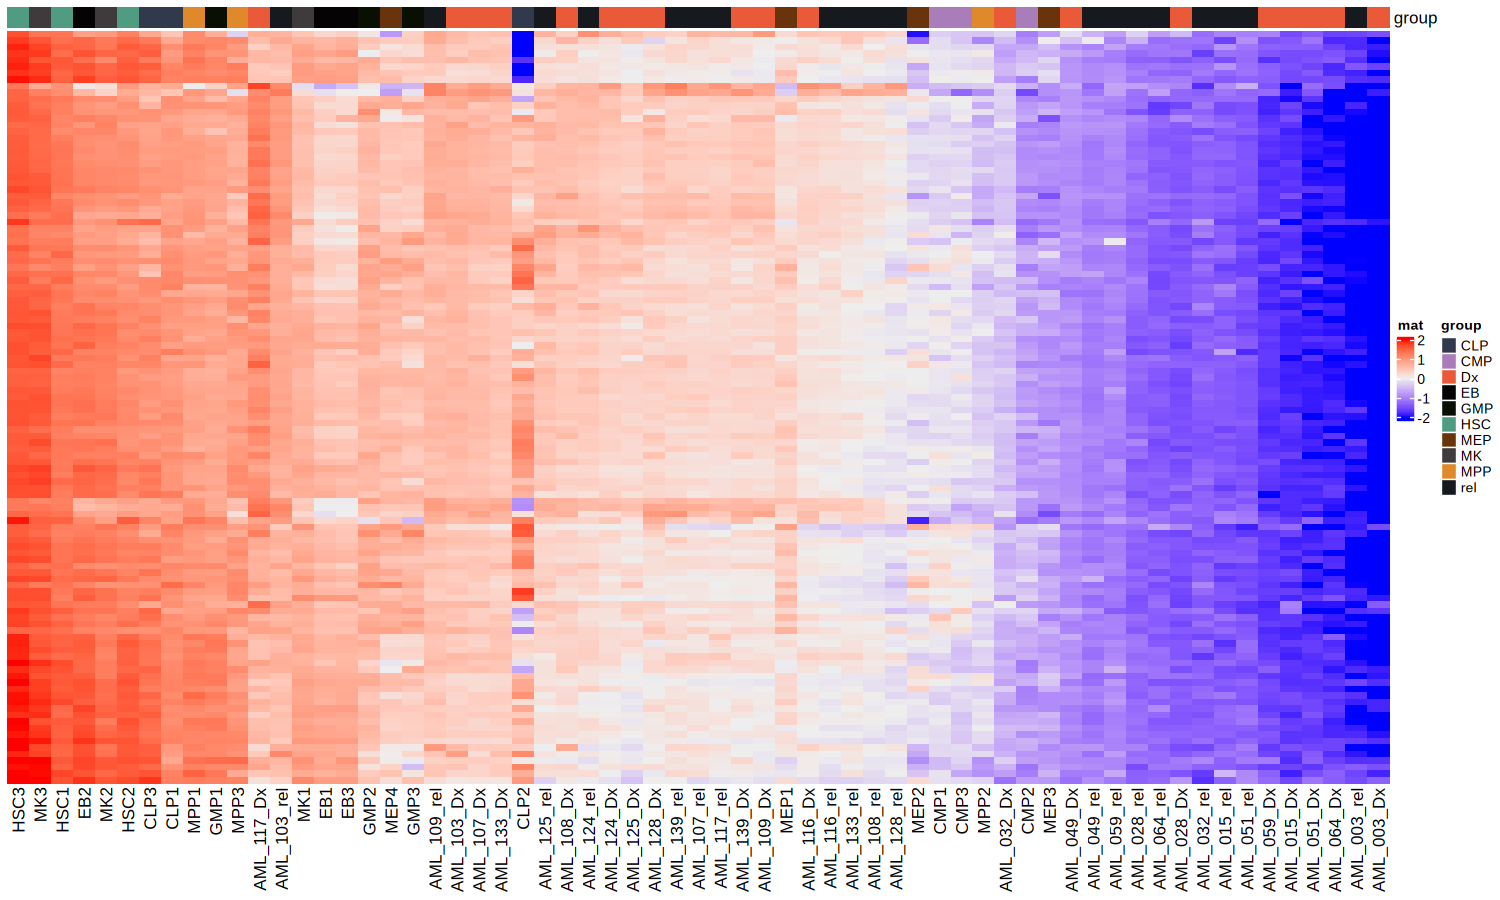

In [52]:
options(repr.plot.width = 15, repr.plot.height = 9, repr.plot.res = 100)

plotdat = logcpm_mtx[te_sel$rn, dsn$rn]

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_df[, 'group', drop = F])
Heatmap(plotdat, name = "mat", show_column_names = T, show_row_names = F, show_column_dend = F, cluster_columns  = T, cluster_rows = T,  
        show_row_dend = F, top_annotation = column_ha)


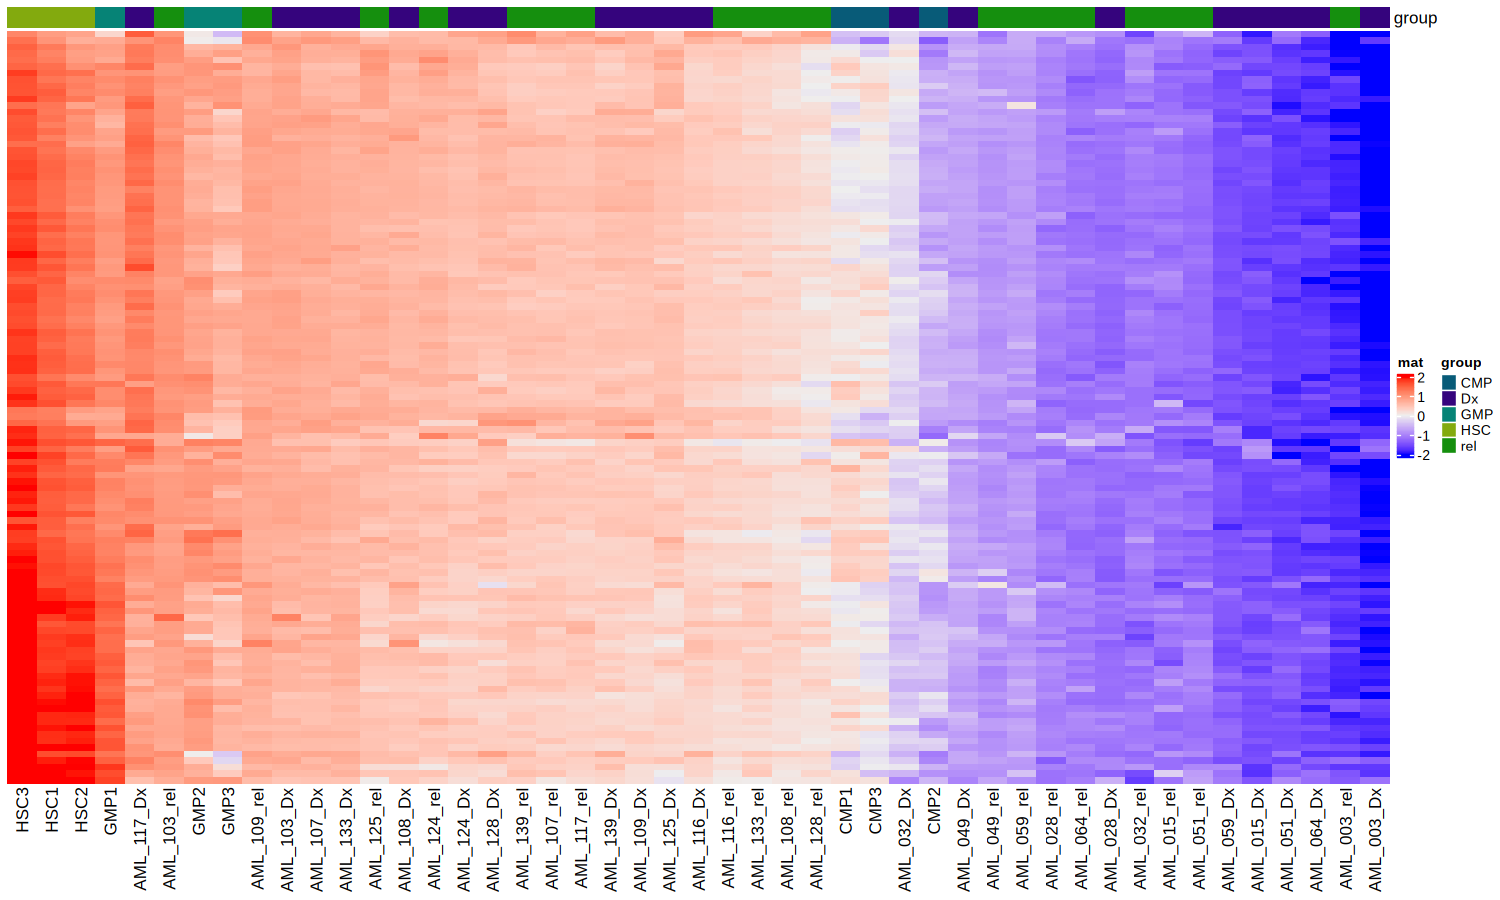

In [53]:
options(repr.plot.width = 15, repr.plot.height = 9, repr.plot.res = 100)

dsn_df_sel = dsn_df[dsn_df$group %in% c('HSC', 'CMP', 'GMP', 'Dx', 'rel'), ]
plotdat = logcpm_mtx[te_sel$rn, rownames(dsn_df_sel)]

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_df_sel[, 'group', drop = F])
Heatmap(plotdat, name = "mat", show_column_names = T, show_row_names = F, show_column_dend = F, cluster_columns  = T, cluster_rows = T,  
        show_row_dend = F, top_annotation = column_ha)


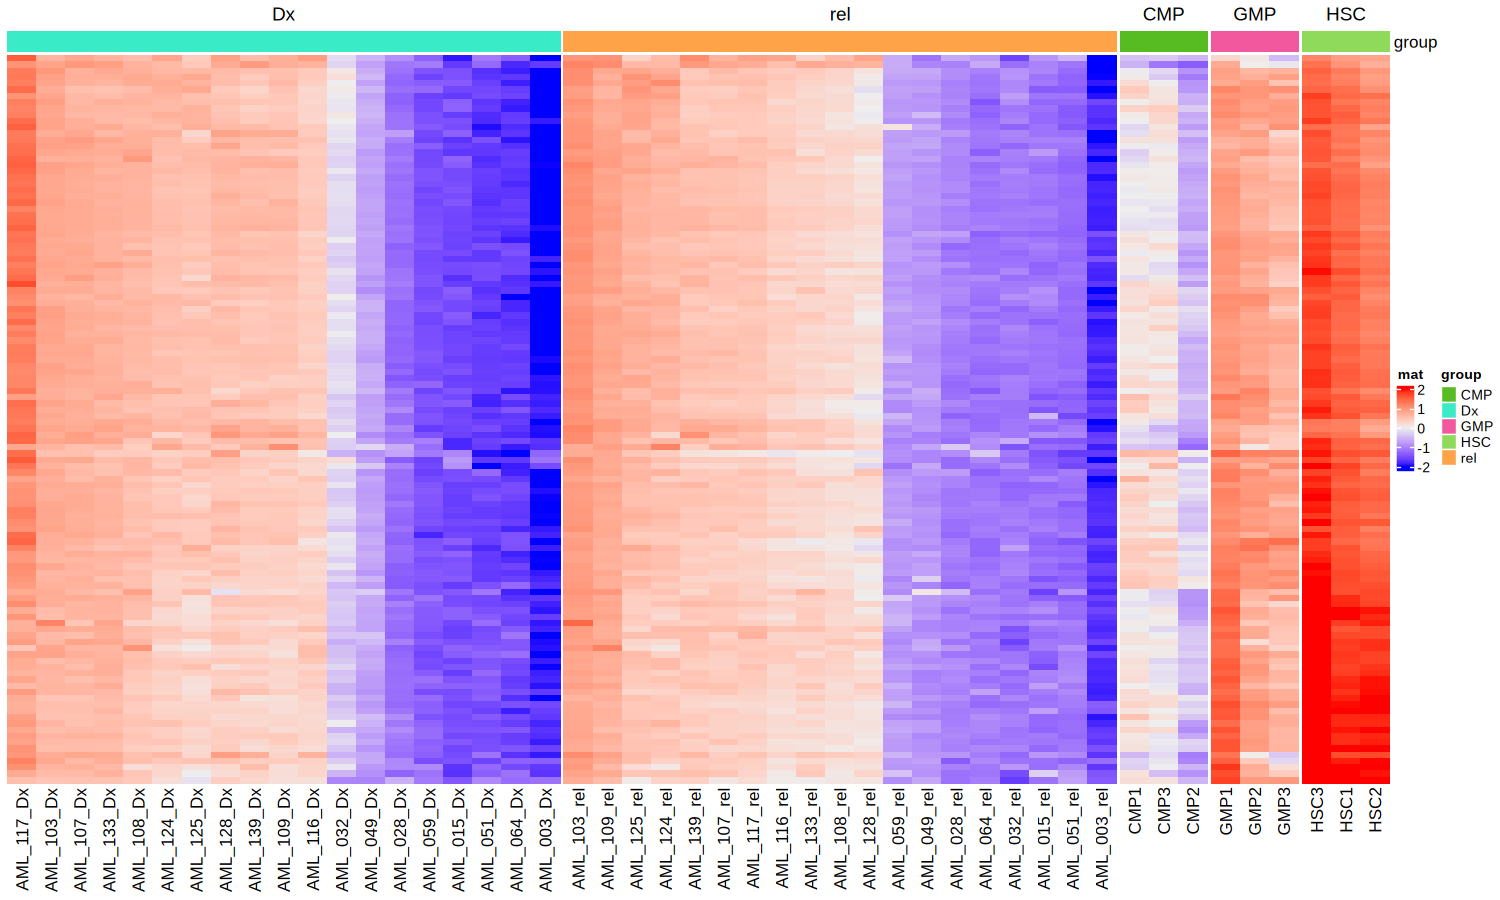

In [56]:
options(repr.plot.width = 15, repr.plot.height = 9, repr.plot.res = 100)

dsn_df_sel = dsn_df[dsn_df$group %in% c('HSC', 'CMP', 'GMP', 'Dx', 'rel'), ]
plotdat = logcpm_mtx[te_sel$rn, rownames(dsn_df_sel)]

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_df_sel[, 'group', drop = F])
Heatmap(plotdat, name = "mat", show_column_names = T, show_row_names = F, show_column_dend = F, cluster_columns  = T, cluster_rows = T,  
        show_row_dend = F, top_annotation = column_ha, column_split = factor(dsn_df_sel$group))



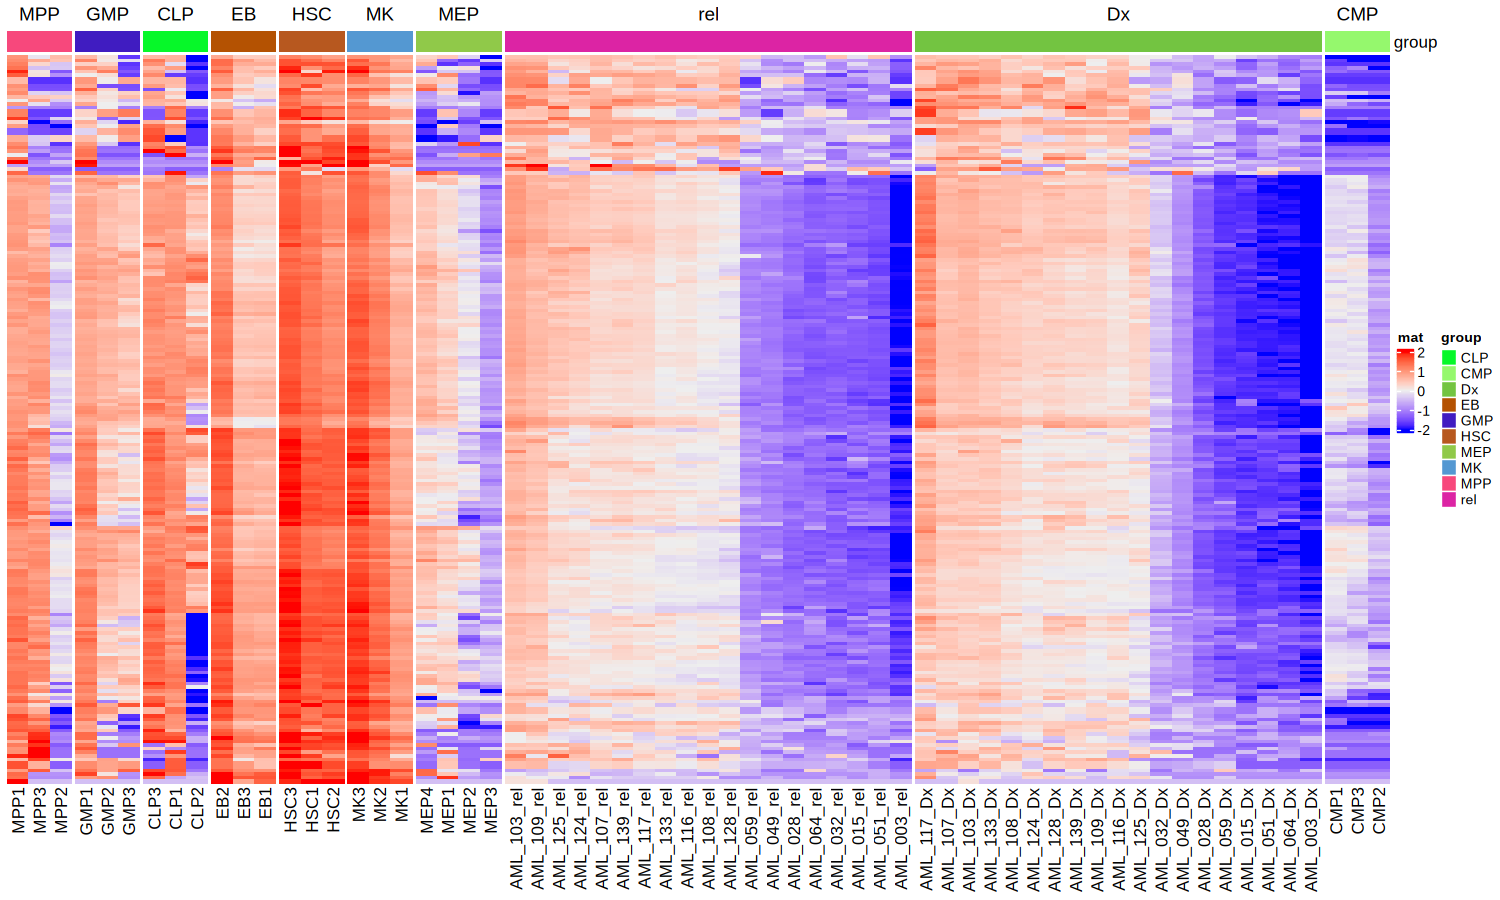

In [47]:
options(repr.plot.width = 15, repr.plot.height = 9, repr.plot.res = 100)

plotdat = logcpm_mtx[te_sel$rn, dsn$rn]

plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

column_ha = HeatmapAnnotation(df = dsn_df[, 'group', drop = F])
Heatmap(plotdat, name = "mat", show_column_names = T, show_row_names = F, show_column_dend = F, cluster_columns  = T, cluster_rows = T,  
        show_row_dend = F, top_annotation = column_ha) , column_split = factor(dsn$group))
